In [1]:
import numpy,pandas,datetime
import scanpy
scanpy.settings.verbosity=5
resultsFile='resultsFile.12105.h5ad'

# 1. Reading data

In [2]:
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

idata=scanpy.read_csv('/Volumes/omics4tb2/alomana/projects/mscni/data/scanpy/count file all day clean.csv')
adata=idata.transpose()
print(adata)
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

2019-03-19 10:49:12
AnnData object with n_obs × n_vars = 3477 × 22662 
2019-03-19 10:49:20


# 2. Preprocessing

In [3]:
scanpy.pp.filter_cells(adata,min_genes=200)
scanpy.pp.filter_genes(adata,min_cells=3)
print(adata)

filtered out 10557 genes that are detected in less than 3 cells
AnnData object with n_obs × n_vars = 3477 × 12105 
    obs: 'n_genes'
    var: 'n_cells'


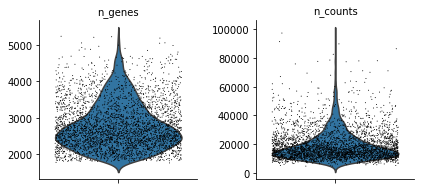

In [4]:
adata.obs['n_counts'] = adata.X.sum(axis=1)
scanpy.pl.violin(adata, ['n_genes', 'n_counts'],jitter=0.4, multi_panel=True)

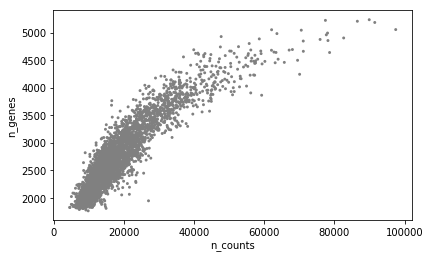

In [5]:
scanpy.pl.scatter(adata, x='n_counts', y='n_genes')

In [6]:
scanpy.pp.normalize_per_cell(adata, counts_per_cell_after=1e5)
scanpy.pp.log1p(adata)

    normalizing by total count per cell
        finished (0:00:00.39): normalized adata.X and added
        'n_counts', counts per cell before normalization (adata.obs)


In [7]:
scanpy.pp.regress_out(adata, ['n_counts'])
scanpy.pp.scale(adata, max_value=10)
print(adata)

regressing out ['n_counts']
    finished (0:00:34.88)
    ... clipping at max_value 10
AnnData object with n_obs × n_vars = 3477 × 12105 
    obs: 'n_genes', 'n_counts'
    var: 'n_cells'


# 3. Export

In [8]:
print(adata)

AnnData object with n_obs × n_vars = 3477 × 12105 
    obs: 'n_genes', 'n_counts'
    var: 'n_cells'


In [9]:
adata.write_csvs(resultsFile[:-5]+'.raw',skip_data=False)

writing '.csv' files to resultsFile.12105.raw
